In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

import neuro_op as nop

In [2]:
mu_arr = np.linspace(-10, 10, 1000)
world_data = st.norm.rvs(loc=0, scale=1, size=100000)

In [3]:
node_g = nop.NodeGridMu(
    node_id=0,
    log_priors=st.norm.logpdf(x=mu_arr, loc=4, scale=50),
)

node_c = nop.NodeConjMu(
    node_id=1,
    params_node=dict(loc=4, scale=50),
)

for i, x in enumerate(world_data):
    node_g.set_updated_belief(st.norm, mu_arr, 1, x, -1, i)
    node_c.set_updated_belief(x, -1, i)

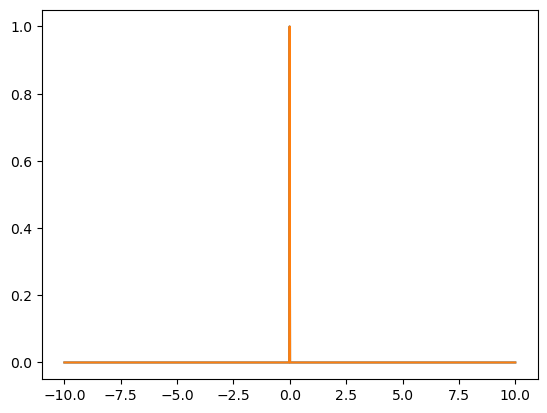

In [4]:
p_g = np.exp(node_g.log_probs)
p_c = st.norm.pdf(x=mu_arr, **node_c.params_node)
plt.plot(mu_arr, p_g / np.max(p_g), label="Grid")
plt.plot(mu_arr, p_c / np.max(p_c), label="Conj")